In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("covid_data.csv")

df.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [3]:
df.shape

(4212, 14)

In [4]:
df.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4212 non-null   int64  
 1   sex               318 non-null    object 
 2   birth_year        292 non-null    float64
 3   country           4212 non-null   object 
 4   region            305 non-null    object 
 5   group             76 non-null     object 
 6   infection_reason  130 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       62 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    4212 non-null   object 
 11  released_date     28 non-null     object 
 12  deceased_date     13 non-null     object 
 13  state             4212 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 460.8+ KB


In [6]:
#Check for missing Values
df.isnull().sum()


id                     0
sex                 3894
birth_year          3920
country                0
region              3907
group               4136
infection_reason    4082
infection_order     4177
infected_by         4150
contact_number      4180
confirmed_date         0
released_date       4184
deceased_date       4199
state                  0
dtype: int64

## Dataset Overview

The dataset contains patient-level COVID-19 case records including:
- Demographic information (sex, birth year, country, region)
- Infection details (infection reason, infection order)
- Exposure metrics (contact number)
- Timeline data (confirmed, released, deceased dates)
- Case outcome (released, isolated, deceased)


In [7]:
# Convert date columns to datetime
date_cols = ['confirmed_date', 'released_date', 'deceased_date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

df[date_cols].head()


,confirmed_date,released_date,deceased_date
0,2020-01-20,2020-02-06,NaT
1,2020-01-24,2020-02-05,NaT
2,2020-01-26,2020-02-12,NaT
3,2020-01-27,2020-02-09,NaT
4,2020-01-30,NaT,NaT


In [8]:
# Calculate recovery days
df['recovery_days'] = (df['released_date'] - df['confirmed_date']).dt.days

df[['confirmed_date', 'released_date', 'recovery_days']].head()


,confirmed_date,released_date,recovery_days
0,2020-01-20,2020-02-06,17.0
1,2020-01-24,2020-02-05,12.0
2,2020-01-26,2020-02-12,17.0
3,2020-01-27,2020-02-09,13.0
4,2020-01-30,NaT,NaN


In [9]:
# Keep recovery days only for released patients
df.loc[df['state'] != 'released', 'recovery_days'] = None

df['recovery_days'].describe()


count    28.000000
mean     15.107143
std       5.626256
min       7.000000
25%       9.750000
50%      16.000000
75%      19.250000
max      24.000000
Name: recovery_days, dtype: float64

In [10]:
# Assume outbreak year as 2020
df['age'] = 2020 - df['birth_year']

df[['birth_year', 'age']].head()


,birth_year,age
0,1984.0,36.0
1,1964.0,56.0
2,1966.0,54.0
3,1964.0,56.0
4,1987.0,33.0


In [11]:
# Remove unrealistic ages
df.loc[(df['age'] < 0) | (df['age'] > 120), 'age'] = None

df['age'].describe()


count    292.000000
mean      46.815068
std       17.336573
min        2.000000
25%       33.000000
50%       48.000000
75%       61.000000
max       83.000000
Name: age, dtype: float64

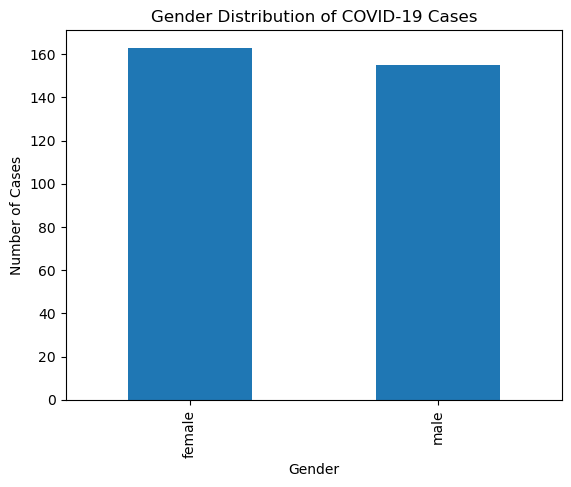

In [12]:
# Gender distribution
df['sex'].value_counts().plot(kind='bar')
plt.title("Gender Distribution of COVID-19 Cases")
plt.xlabel("Gender")
plt.ylabel("Number of Cases")
plt.show()


### Gender Distribution

The bar chart shows the distribution of confirmed COVID-19 cases by gender.
This helps identify whether infections were more prevalent in males or females
during the early outbreak phase.


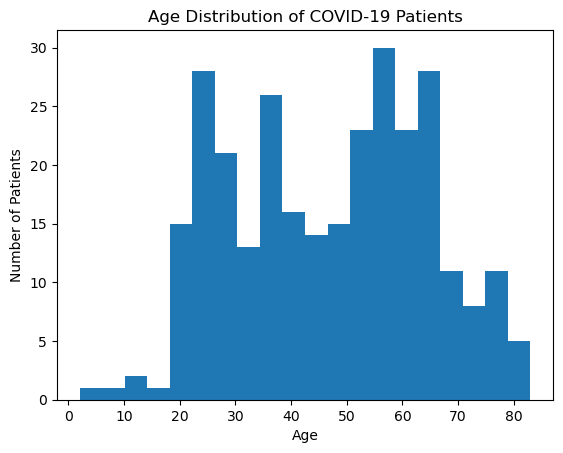

In [13]:
# Age distribution
df['age'].dropna().plot(kind='hist', bins=20)
plt.title("Age Distribution of COVID-19 Patients")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


### Age Distribution

The histogram shows the distribution of COVID-19 cases across different age
groups. Most cases appear concentrated within specific working-age groups.


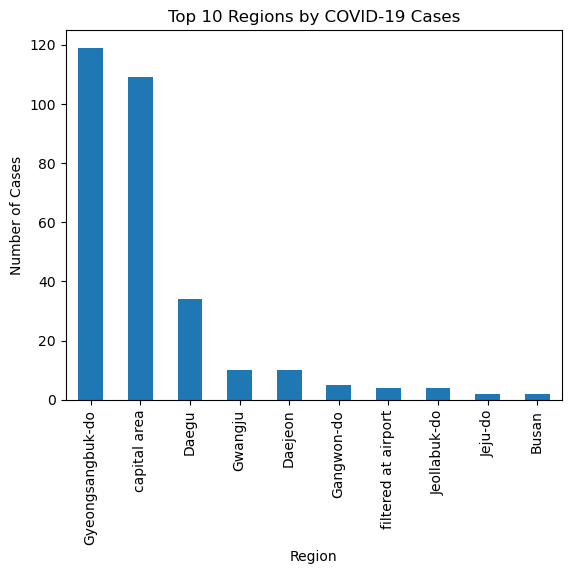

In [14]:
# Top 10 affected regions
df['region'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Regions by COVID-19 Cases")
plt.xlabel("Region")
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
plt.show()


### Regional Impact

The bar chart highlights the top regions affected by COVID-19.
This information can help authorities prioritize healthcare resources.


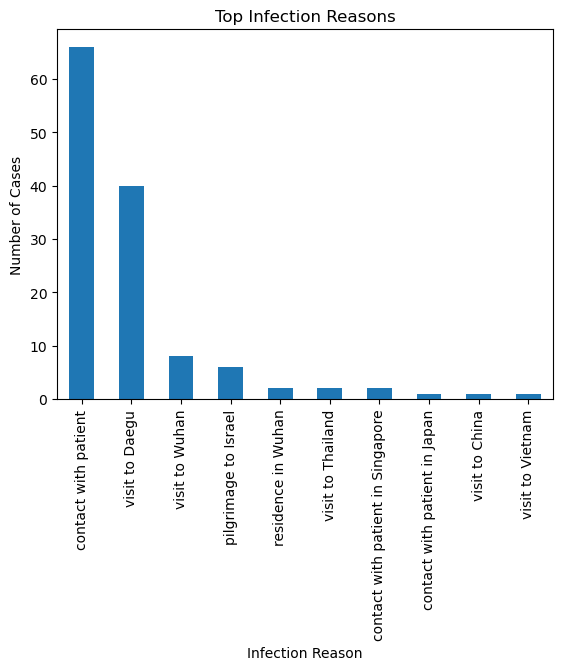

In [15]:
df['infection_reason'].value_counts().head(10).plot(kind='bar')
plt.title("Top Infection Reasons")
plt.xlabel("Infection Reason")
plt.ylabel("Number of Cases")
plt.xticks(rotation=90)
plt.show()


### Infection Reasons

The bar chart shows the most common infection reasons among confirmed cases.
This helps understand how the disease primarily spread during the early phase
of the outbreak.


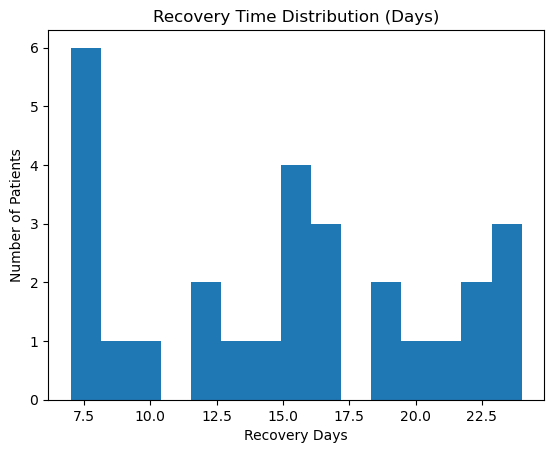

In [16]:
df['recovery_days'].dropna().plot(kind='hist', bins=15)
plt.title("Recovery Time Distribution (Days)")
plt.xlabel("Recovery Days")
plt.ylabel("Number of Patients")
plt.show()


### Recovery Time Analysis

The histogram represents the distribution of recovery duration among released
patients. Most recoveries occurred within a specific time range, indicating
typical recovery periods during early COVID-19 cases.


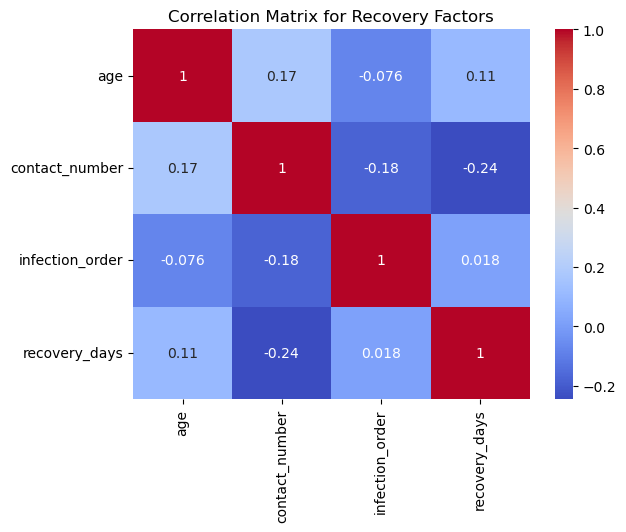

In [17]:
corr_df = df[['age', 'contact_number', 'infection_order', 'recovery_days']]
corr_df = corr_df.dropna()
corr_matrix = corr_df.corr()
corr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Recovery Factors")
plt.show()


## Correlation Analysis & Insights

The correlation analysis shows the relationship between recovery duration and
various factors such as age, contact number, and infection order.

- Age shows a weak to moderate correlation with recovery time.
- Contact number shows little to no correlation with recovery duration.
- Infection order does not significantly influence recovery time.

Overall, no single factor strongly determines recovery duration, suggesting
that recovery is influenced by multiple medical and individual factors.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X = corr_df[['age', 'contact_number', 'infection_order']]
y = corr_df['recovery_days']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
y_pred = model.predict(X_test)


In [20]:
r2 = r2_score(y_test, y_pred)
r2


-0.6576996191606157

## Model Performance Discussion

The Linear Regression model resulted in a negative R² score, indicating that
the selected features (age, contact number, and infection order) are not
sufficient to accurately predict recovery duration.

This outcome is expected due to the limited number of released cases and the
complex nature of medical recovery, which depends on multiple clinical and
biological factors not present in the dataset.

The model was implemented as a baseline approach to demonstrate the machine
learning workflow rather than to achieve high predictive accuracy.


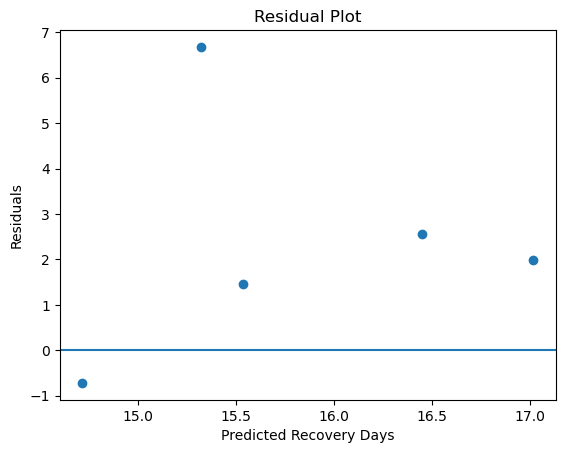

In [21]:
residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Recovery Days")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


## Conclusion

This project analyzed early-stage COVID-19 patient-level data to understand
infection patterns, demographic trends, recovery timelines, and regional impact.

Exploratory Data Analysis revealed variations in case distribution across
gender, age groups, and regions, highlighting geographic hotspots and common
infection sources during the initial outbreak phase.

Recovery trend analysis showed that most released patients recovered within a
limited time range. Correlation analysis indicated that demographic and exposure
features such as age, contact number, and infection order have weak relationships
with recovery duration.

A Linear Regression model was implemented as a baseline predictive approach.
The model achieved limited performance, reflecting the complex and multifactorial
nature of medical recovery outcomes.

Overall, the analysis demonstrates that while demographic data provides useful
descriptive insights, accurate recovery prediction requires richer clinical
and biological information. The findings can support early-stage public health
planning, screening strategies, and resource allocation.
